In [1]:
import pandas as pd
import numpy as np 
from pylab import plt
from scipy.optimize import curve_fit
from scipy.stats import lognorm, kstest


df = pd.read_excel('/Users/ananth/Desktop/salinity_snowdepth.xlsx');

a = df.to_numpy()

In [2]:
df
salinity = df.Sp
snow_depth = df.Snow_depth

# Plot salinity vs snow depth from frey et al 2020 and confer et al 2023

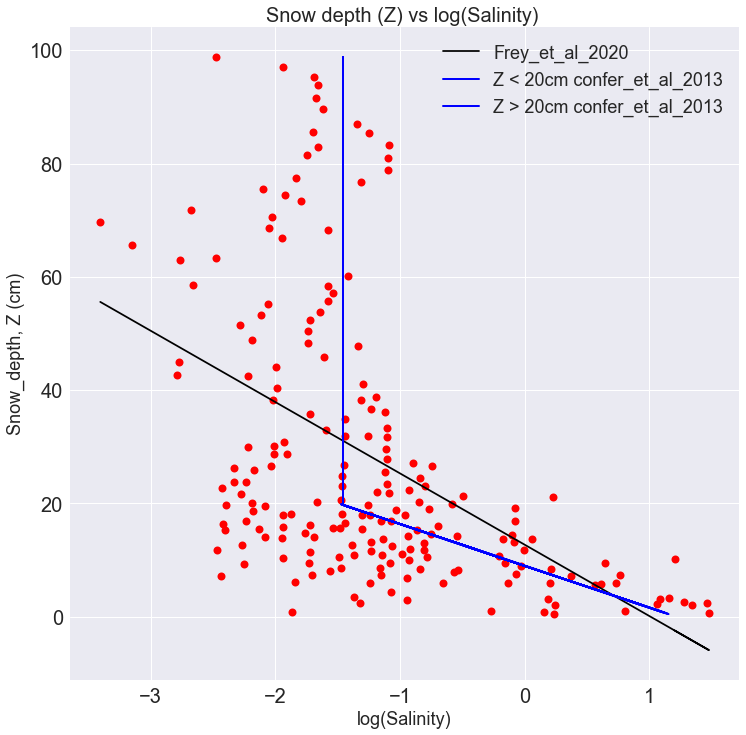

In [3]:
plt.figure(figsize=(12,12))
plt.style.use('seaborn')

sd_slice1 = snow_depth[snow_depth<20]
sd_slice2 = snow_depth[snow_depth>=20]

sp_slice1 = salinity[snow_depth<20]
sp_slice2 = salinity[snow_depth>20]

plt.plot(np.log10(salinity),snow_depth,'r.',markersize = 16)

linear_fit = np.polyfit(np.log10(salinity),snow_depth,1)
Y_fit = np.polyval(linear_fit,np.log10(salinity))
#plt.plot(np.log10(salinity),func_1(salinity,*popt),'k.')
plt.plot(np.log10(salinity),Y_fit,'k-', label = 'Frey_et_al_2020')
#plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Snow depth (Z) vs log(Salinity) ',fontsize = 20)
plt.xlabel('log(Salinity)',fontsize = 18)
plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)

# inserting parametrisation from confer et al 2013

sp_confer_1 = 16.47 * np.exp(-0.312*sd_slice1) # z between 0 and 20 cm 
sp_confer_2 = np.array([0.035]*len(sd_slice2)) # for z >20 cm

plt.plot(np.log10(sp_confer_1), sd_slice1, 'b-', linewidth = 2, label = 'Z < 20cm confer_et_al_2013')
plt.plot(np.log10(sp_confer_2), sd_slice2, 'b-', linewidth = 2, label = 'Z > 20cm confer_et_al_2013')
plt.legend(fontsize = 18)



/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  """
/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


Text(0, 0.5, 'Snow_depth, Z (cm)')

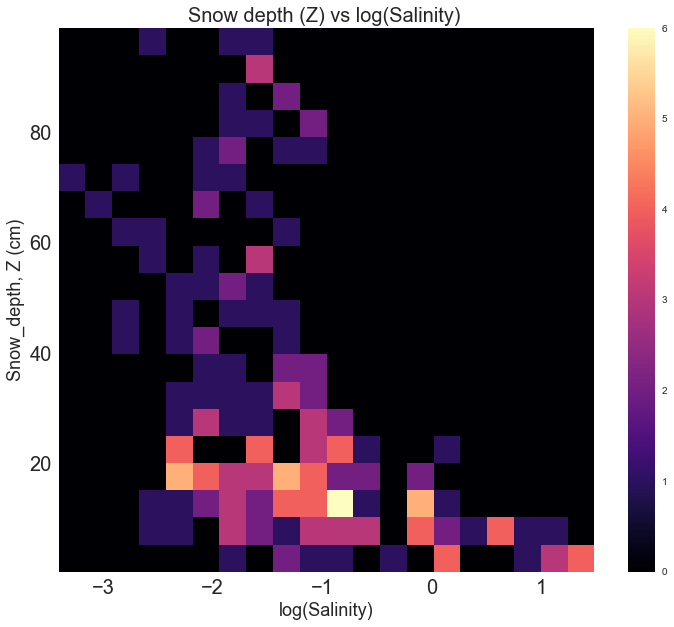

In [4]:
# histogram plot of snowdepth on y axis and salinity on x axis

plt.figure(figsize=(12,10))
plt.style.use('seaborn')
plt.hist2d(np.log10(salinity),snow_depth, bins = 20, cmap = 'magma')
plt.colorbar()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Snow depth (Z) vs log(Salinity) ',fontsize = 20)
plt.xlabel('log(Salinity)',fontsize = 18)
plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)



Text(0.5, 0, 'log(Salinity)')

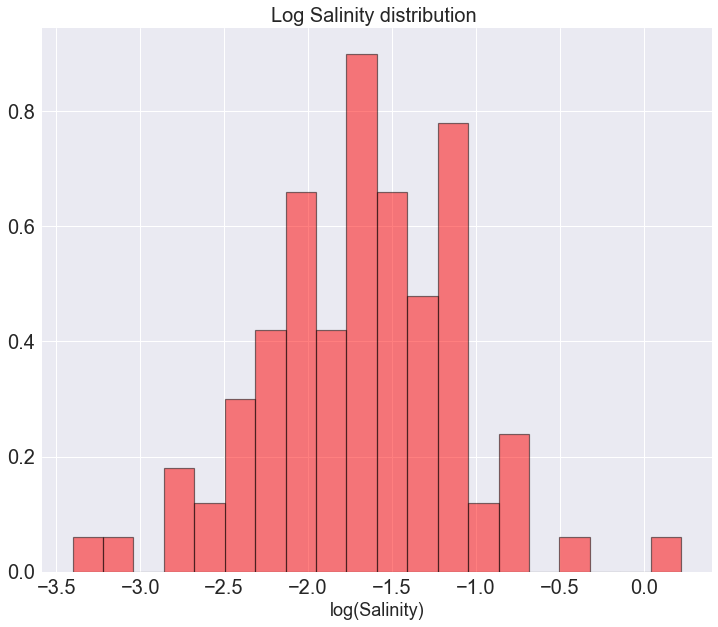

In [7]:
# histogram plot of snowdepth on y axis and salinity on x axis
flag = (snow_depth>20) & (snow_depth<100)
salinity_2 = salinity[flag]
plt.figure(figsize=(12,10))
plt.style.use('seaborn')
plt.hist(np.log10(salinity_2),bins = 20, color = 'r', alpha = 0.5, label = 'Data', edgecolor = 'k', linewidth = 1.2, density = True)
#plt.colorbar()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Log Salinity distribution ',fontsize = 20)
plt.xlabel('log(Salinity)',fontsize = 18)
#plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)


#plt.hist(salinity_slice, bins = 10, density = True, color = 'r', alpha = 0.5, label = 'Data')

# Fitting a Normal distribution to the data 

Text(0, 0.5, 'Prabability density')

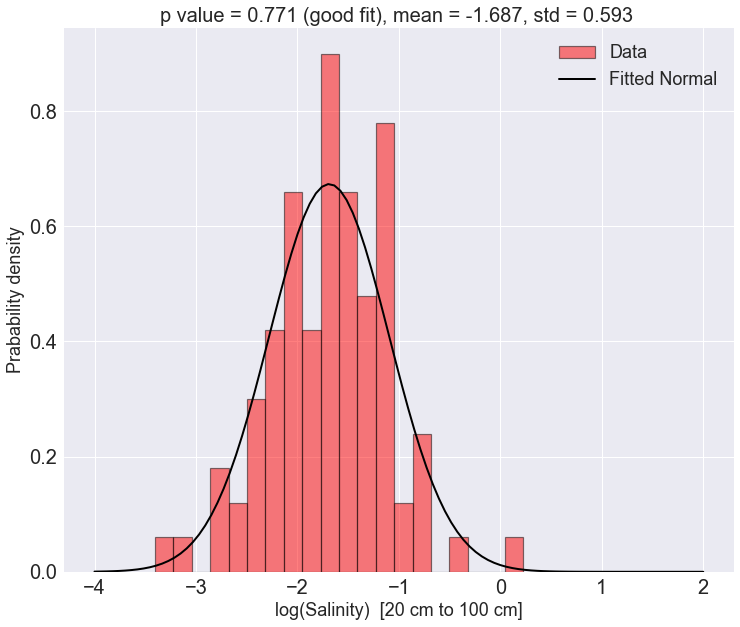

In [9]:
# histogram plot of snowdepth on y axis and salinity on x axis
from scipy.stats import norm

bin1 = 20
bin2 = 100

flag = (snow_depth>bin1) & (snow_depth<bin2)
salinity_2 = salinity[flag]
plt.figure(figsize=(12,10))
plt.style.use('seaborn')
plt.hist(np.log10(salinity_2),bins = 20, color = 'r', alpha = 0.5, label = 'Data', edgecolor = 'k', linewidth = 1.2, density = True)

mean, std = norm.fit(np.log10(salinity_2))
x = np.linspace(-4, 2, 100)
pdf_fitted = norm.pdf(x, mean, std)

# estimate the p value using the Kolmogorov-Smirnov test
p_value = kstest(np.log10(salinity_2), 'norm', args=(mean, std))[1]
p_value = np.round(p_value, 3)
flag = ''
if p_value > 0.05:
    flag2 = 'good fit'
else:
    flag2 = 'bad fit'


plt.plot(x, pdf_fitted, 'k-', linewidth = 2, label = 'Fitted Normal')
plt.legend(fontsize = 18)

#plt.colorbar()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(f'p value = {p_value} ({flag2}), mean = {round(mean,3)}, std = {round(std,3)} ',fontsize = 20)
plt.xlabel(f'log(Salinity)  [{bin1} cm to {bin2} cm]',fontsize = 18)
plt.ylabel('Prabability density',fontsize = 18)
#plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)
#plt.yscale('log')


#plt.hist(salinity_slice, bins = 10, density = True, color = 'r', alpha = 0.5, label = 'Data')

# Plot the above distribution iteratively over all snow depth bins 


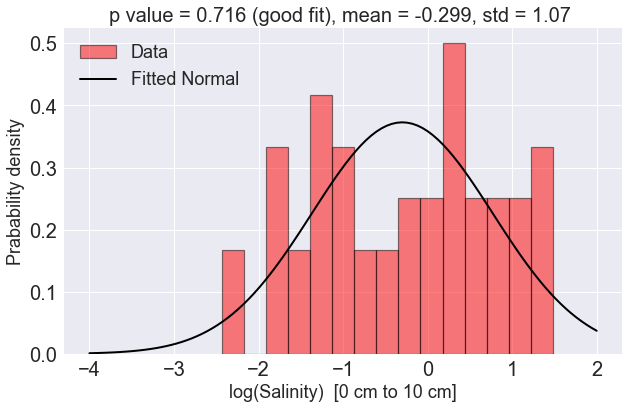

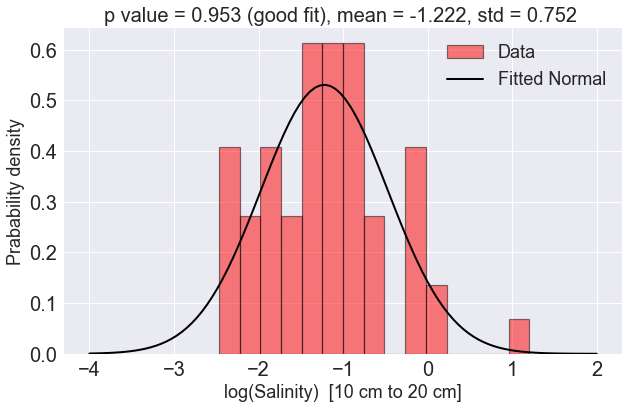

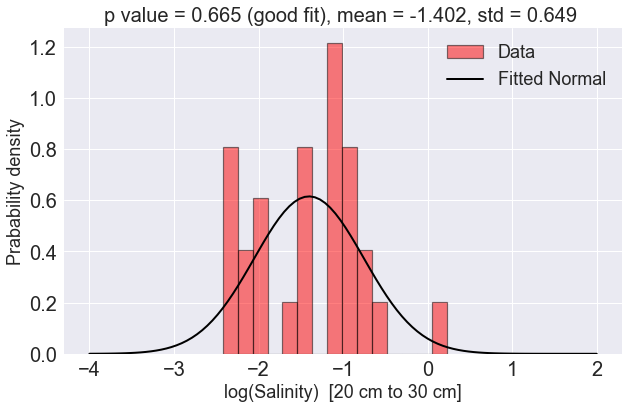

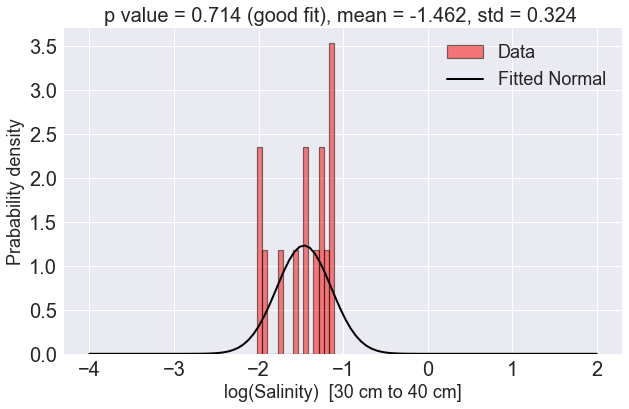

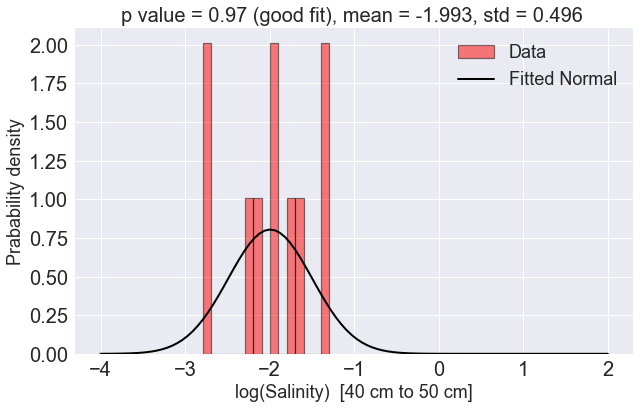

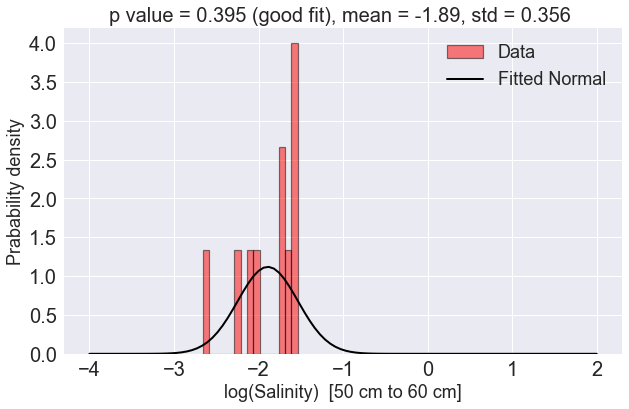

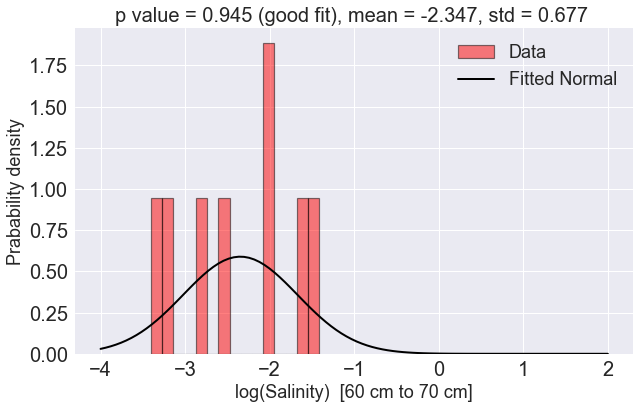

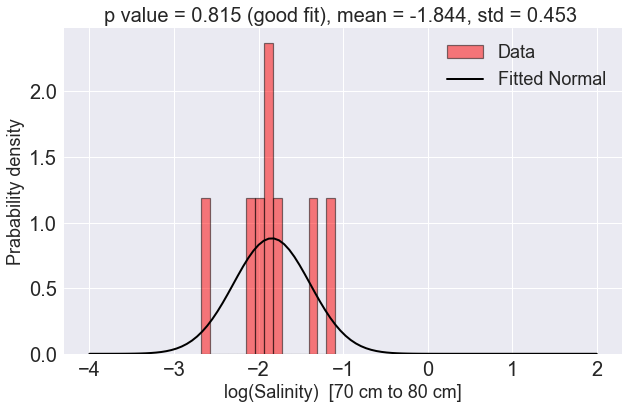

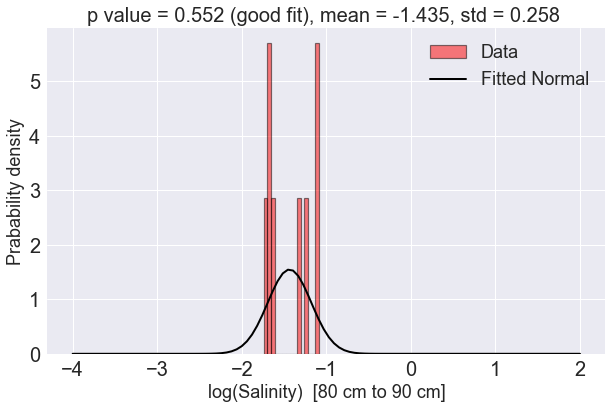

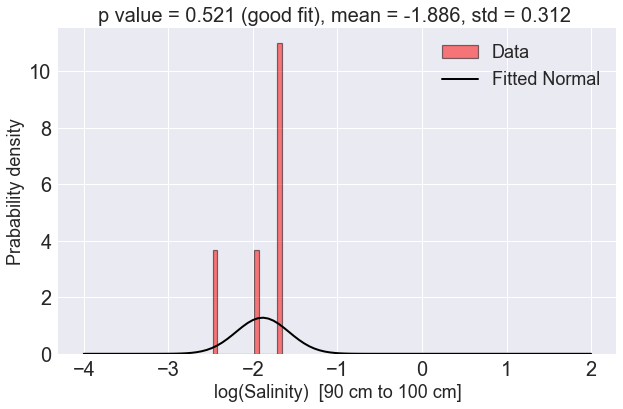

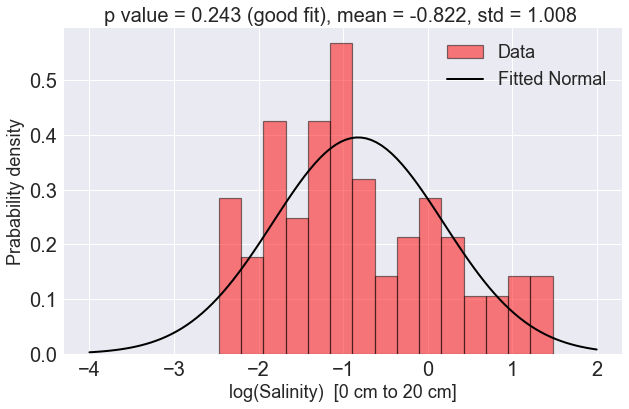

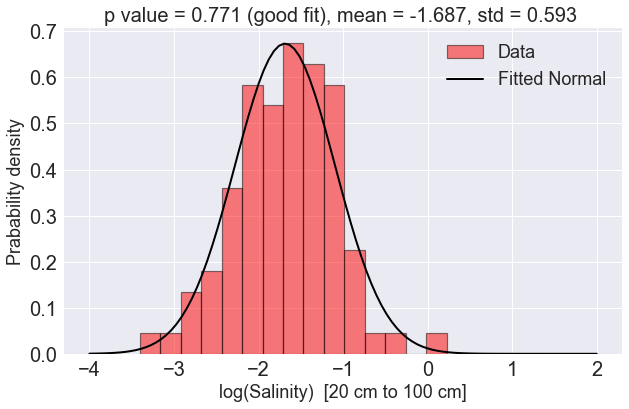

In [21]:
# histogram plot of snowdepth on y axis and salinity on x axis
from scipy.stats import norm

bin_limits = [(i*10, (i+1)*10) for i in range(10)]
bin_limits = [(0,20), (20,100)]
bin_limits = [(0,10), (10,20), (20,30), (30,40), (40,50), (50,60), (60,70), (70,80), (80,90), (90,100), (0,20), (20,100)]
# create an array with each element being a tuple with p value, mean and std
stats_value_array = np.zeros((len(bin_limits),3))
count = 0
for bin1, bin2 in bin_limits:
    #bin1 = 0
    #bin2 = 10

    flag = (snow_depth>bin1) & (snow_depth<bin2)
    salinity_2 = salinity[flag]
    plt.figure(figsize=(10,6))
    plt.style.use('seaborn')
    plt.hist(np.log10(salinity_2),bins = 15, color = 'r', alpha = 0.5, label = 'Data', edgecolor = 'k', linewidth = 1.2, density = True)

    mean, std = norm.fit(np.log10(salinity_2))
    x = np.linspace(np.min(np.log10(salinity_2)), np.max(np.log10(salinity_2)), 100)
    x = np.linspace(-4,2,100)
    pdf_fitted = norm.pdf(x, mean, std)

    # estimate the p value using the Kolmogorov-Smirnov test
    p_value = kstest(np.log10(salinity_2), 'norm', args=(mean, std))[1]
    p_value = np.round(p_value, 3)
    flag = ''
    if p_value > 0.05:
        flag2 = 'good fit'
    else:
        flag2 = 'bad fit'


    plt.plot(x, pdf_fitted, 'k-', linewidth = 2, label = 'Fitted Normal')
    plt.legend(fontsize = 18)

    #plt.colorbar()
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.title(f'p value = {p_value} ({flag2}), mean = {round(mean,3)}, std = {round(std,3)} ',fontsize = 20)
    plt.xlabel(f'log(Salinity)  [{bin1} cm to {bin2} cm]',fontsize = 18)
    plt.ylabel('Prabability density',fontsize = 18)
    stats_value_array[count,0] = round(p_value,3)
    stats_value_array[count,1] = round(mean,3)
    stats_value_array[count,2] = round(std,3)

    count += 1
    #plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)
    #plt.yscale('log')
# create a pandas dataframe with first column as bin limits and the rest of the columns are the stats array
stats_df = pd.DataFrame(stats_value_array, columns = ['p_value', 'mean', 'std'])
stats_df['snow_depth_range(cm)'] = bin_limits
stats_df = stats_df[['snow_depth_range(cm)', 'p_value', 'mean', 'std']]
stats_df.to_csv('stats_df.csv', index = False)

# save the stats array as a csv file
#np.savetxt('stats_array.csv', stats_value_array, delimiter = ',')

#plt.hist(salinity_slice, bins = 10, density = True, color = 'r', alpha = 0.5, label = 'Data')

In [18]:
# size of bin_limits 
len(bin_limits)
  


2